In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix ,plot_confusion_matrix

## Context 
A common risk control method that banks and generally the financial industry use is credit score cards . Personal information and data are extracted by people's applications , to be used in prediction models for the likelyhood of future defaults and credit card borrowins , based on that the bank is able to make more accurate decisions on issuing credit cards to the applicants . 

So in the context of a course in Big Data , in AUEB Management Science and Technology we will use a dataset we extracted from [Kaggle](https://www.kaggle.com/rikdifos/credit-card-approval-prediction) to build such predictive models . 

**This file contains the whole process for extracting/transforming the data to run the models.** Not the warehouse process

## ETL Process

We read the files the files we extracted from the [Credit Card Approval Prediction Kaggle Dataset](https://www.kaggle.com/rikdifos/credit-card-approval-prediction)  with the help of .read_csv from pandas . 
The data is only in csv format so the extraction is pretty straight forward. 

## Extraction  and Data Overview

In [2]:
ApplicationDF = pd.read_csv("Bank Data/application_record.csv")
CreditDF =  pd.read_csv("Bank Data/credit_record.csv")

### Application Table Context and Explanation
| Feature name        | Explanation              |
|---------------------|--------------------------|
| ID                  | Client number            |
| CODE_GENDER         | Gender                   |
| FLAG_OWN_CAR        | Is there a car           |
| FLAG_OWN_REALTY     | Is there a property      |
| CNT_CHILDREN        | Number of children       |
| AMT_INCOME_TOTAL    | Annual income            |
| NAME_INCOME_TYPE    | Income category          |
| NAME_EDUCATION_TYPE | Education level          |
| NAME_FAMILY_STATUS  | Marital status           |
| NAME_HOUSING_TYPE   | Way of living            |
| DAYS_BIRTH          | Birthday                 |
| DAYS_EMPLOYED       | Start date of employment |
| FLAG_MOBIL          | Is there a mobile phone  |
| FLAG_WORK_PHONE     | Is there a work phone    |
| FLAG_PHONE          | Is there a phone         |
| FLAG_EMAIL          | Is there an email        |
| OCCUPATION_TYPE     | Occupation               |
| CNT_FAM_MEMBERS     | Family size              |

##### Note 

* On **DAYS_BIRTH**
Count backwards from current day (0), -1 means yesterday
* On **DAYS_EMPLOYED**
Count backwards from current day(0). If positive, it means the person currently unemployed.


In [3]:
print(ApplicationDF.shape)
print(ApplicationDF.dtypes)
ApplicationDF.head(10)
# No problem or fixing needed for the types , pandas extracted correctly the file. 

(438557, 18)
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


### Credit Table Context and Explanation

| Feature name   | Explanation   |
|----------------|---------------|
| ID             | Client number |
| Months Balance | Record Month  |
| STATUS         | Status        |

* On **MONTHS_BALANCE**
The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
* On **STATUS**
0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [4]:
print(CreditDF.shape)
print(CreditDF.dtypes)
CreditDF.sort_values(by=['ID'])
# No problem here either for data types . 

(1048575, 3)
ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
22,5001712,-18,0
...,...,...,...
1048547,5150487,-2,C
1048546,5150487,-1,C
1048545,5150487,0,C
1048558,5150487,-13,C


## Transformation - Application and Credit Data

Let's start with the Application dataset starting with checking for missing data . 

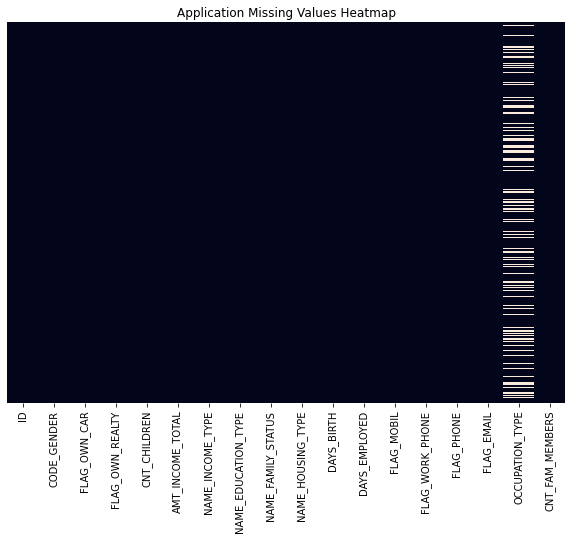

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


In [5]:
#set figure size
plt.figure(figsize=(10,7))
#generate heatmap
sns.heatmap(ApplicationDF.isnull(), cbar=False)
#labels and titles
plt.title("Application Missing Values Heatmap")
plt.yticks([])
plt.show()
print(ApplicationDF.isnull().sum())

**We can see that the occupation type  has an enormous amount of missing values so we thought that it was best to drop the column entirely ( 31% of column was Null) and not fill it with the AVG values or something else.**

In [6]:
ApplicationDF = ApplicationDF.drop(columns=['OCCUPATION_TYPE'])

**Now Lets check for missing values in the Credit DF**

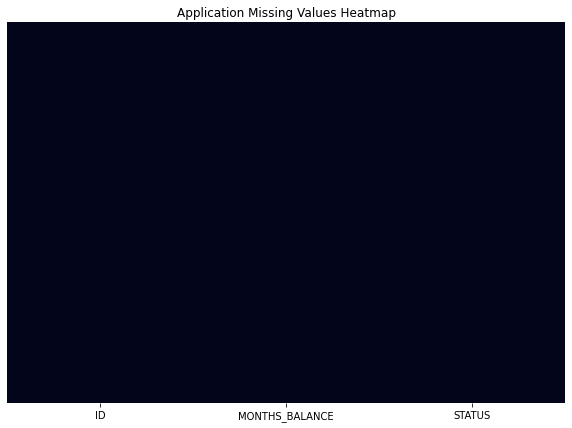

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(CreditDF.isnull(), cbar=False)
plt.title("Application Missing Values Heatmap")
plt.yticks([])
plt.show()
print(CreditDF.isnull().sum())

### Checking for Duplicate values
We continue by checking for duplicate values in the Application Dataset **47** to be exact   and dropping them.

In [8]:
ApplicationDF = ApplicationDF.drop_duplicates('ID', keep='last')

### Renaming columns

In [9]:
ApplicationDF.rename(columns={"CODE_GENDER":"Gender","FLAG_OWN_CAR":"Own_Car","FLAG_OWN_REALTY":"Own_Realty",
                     "CNT_CHILDREN":"Children_Count","AMT_INCOME_TOTAL":"Income","NAME_EDUCATION_TYPE":"Education",
                     "NAME_FAMILY_STATUS":"Family_Status","NAME_HOUSING_TYPE":"Housing_Type","DAYS_BIRTH":"Birthday",
                     "DAYS_EMPLOYED":"Employment_Date","FLAG_MOBIL":"Own_Mobile","FLAG_WORK_PHONE":"Own_Work_Phone",
                     "FLAG_PHONE":"Own_Phone","FLAG_EMAIL":"Own_Email","CNT_FAM_MEMBERS":"Family_Members_Count",
                    "NAME_INCOME_TYPE":"Income_Type"},inplace=True)

### Encoding - Transform non numeric data columns into numeric and add dummy variables for Models
We see that we have a lot of columns that have non numeric values that we can't use in our analysis, so we have to replace them, for our models

In [10]:
# For the family status column we saw no reason to have civil marriage and married as different 
# categories so we replaced with Married and values 1 - 0 for True false
ApplicationDF["Married"] = ApplicationDF["Family_Status"].replace(["Civil marriage","Married","Single / not married",
                                                                          "Separated","Widow"],[1,1,0,0,0])

# We also saw no value in keeping variables for Municipal apartment or office apartment e.x 
# So we instead kept rented , owned , and living with parents

housing_type ={'House / apartment' :'Owned',
               'Municipal apartment' :'Owned',
               'Office apartment':'Owned',
               'Co-op apartment':'Owned',
               'Rented apartment':'Rented',
               'With parents' : 'With parents'
               }

ApplicationDF['Housing_Type'] = ApplicationDF["Housing_Type"].map(housing_type)


# Education type also encoded by taking a look at questionnaires online
# we translated higher education as post high school but not university
education_type = {'Secondary / secondary special':'Secondary',
                     'Lower secondary':'Secondary',
                     'Higher education':'College',
                     'Incomplete higher':'College',
                     'Academic degree':'University'}

ApplicationDF["Education"] = ApplicationDF["Education"].map(education_type)

# Associate or servant do diffrence value to our models so 3 categories
# Pensions , Worker , Student
income_type = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}

ApplicationDF["Income_Type"] = ApplicationDF["Income_Type"].map(income_type)

ApplicationDF["Household_Size"] = ApplicationDF["Children_Count"] + ApplicationDF["Married"].apply(lambda x: 2 if x==1 else 1)

# We divide the age and experience columns by 365 to get it in years .
ApplicationDF["Age"] = round((ApplicationDF.Birthday/365)*-1)
ApplicationDF["Experience"] = ApplicationDF.Employment_Date/365

ApplicationDF['Experience']= ApplicationDF['Experience'].apply(lambda v : int(v*-1) if v <0 else 0)

# We drop redundant columns that were encoded 
ApplicationDF=ApplicationDF.drop(columns=['Family_Status','Employment_Date','Birthday','Children_Count'])


### Dummy Variables
We continue the encoding by transforming the Own_Car and Own_Realty to binary from Y , N
and using dummy variables for all other categorical variables to be able to use them in our Models , as
string are pretty much unuseable.

In [11]:
# We start by encoding the columns Gender,Own_Car,Own_Realty with binary values for :
# 0 for Female and 1 for Male for gender , and 1 for True and 0 for False for the other two
ApplicationDF["Own_Car"] = ApplicationDF["Own_Car"].replace(["Y","N"],[1,0])
ApplicationDF["Own_Realty"] = ApplicationDF["Own_Realty"].replace(["Y","N"],[1,0])

# We use the get_dummies function for faster encoding in the categorical variables
ApplicationDF= pd.get_dummies(ApplicationDF, columns=['Income_Type', 'Education' ,'Housing_Type'])
ApplicationDF["Gender"] =  ApplicationDF['Gender'].replace(['F','M'],[0,1])

In [1]:
pd.set_option('display.max_columns', None)
ApplicationDF.head()


NameError: name 'pd' is not defined

### Detect outliers
We are going to check if there are outliers in our data that may affect our analysis results

<AxesSubplot:xlabel='ID', ylabel='Experience'>

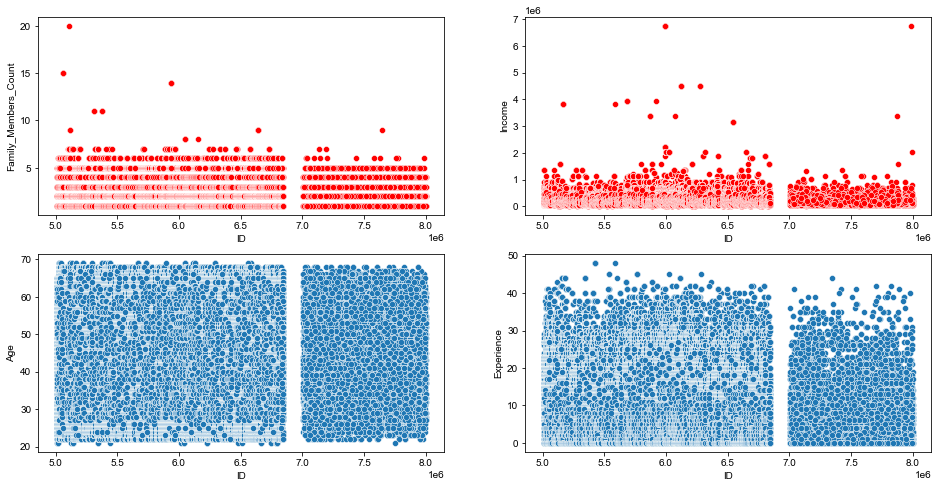

In [13]:
fig, ax= plt.subplots(nrows= 2, ncols = 2, figsize= (16,8))
sns.set_theme()
sns.scatterplot(x='ID', y='Family_Members_Count', data=ApplicationDF, ax=ax[0][0], color= 'red')
sns.scatterplot(x='ID', y='Income', data=ApplicationDF, ax=ax[0][1], color='red' )
sns.scatterplot(x='ID', y='Age', data=ApplicationDF, ax=ax[1][0])
sns.scatterplot(x='ID', y='Experience', data=ApplicationDF, ax=ax[1][1])


We see that there are outliers in 3 columns.
* Family_Members_Count
* Income
* Experience

We need to remove those outliers because they are going to affect the results of our analysis using the boxplot method. 

For Family_Members_Count

In [14]:
Q1 = ApplicationDF['Family_Members_Count'].quantile(0.25)
Q3 = ApplicationDF['Family_Members_Count'].quantile(0.75)
IQR = Q3 - Q1

In [15]:
ApplicationDF = ApplicationDF[~((ApplicationDF['Family_Members_Count'] < (Q1 - 1.5*IQR))|
                              (ApplicationDF['Family_Members_Count'] > (Q3 + 1.5*IQR)))]

For Income

In [16]:
Q1 = ApplicationDF['Income'].quantile(0.25)
Q3 = ApplicationDF['Income'].quantile(0.75)
IQR = Q3 - Q1

In [17]:
ApplicationDF = ApplicationDF[~((ApplicationDF['Income'] < (Q1 - 1.5*IQR))|
                              (ApplicationDF['Income'] > (Q3 + 1.5*IQR)))]

For Experience

In [18]:
Q1 = ApplicationDF['Experience'].quantile(0.25)
Q3 = ApplicationDF['Experience'].quantile(0.75)
IQR = Q3 - Q1

In [19]:
ApplicationDF = ApplicationDF[~((ApplicationDF['Experience'] < (Q1 - 1.5*IQR))|
                              (ApplicationDF['Experience'] > (Q3 + 1.5*IQR)))]
ApplicationDF

,ID,Gender,Own_Car,Own_Realty,Income,Own_Mobile,Own_Work_Phone,Own_Phone,Own_Email,Family_Members_Count,Married,Household_Size,Age,Experience,Income_Type_Pensioner,Income_Type_Student,Income_Type_Working,Education_College,Education_Secondary,Education_University,Housing_Type_Owned,Housing_Type_Rented,Housing_Type_With parents
2,5008806,1,1,1,112500.0,1,0,0,0,2.0,1,2,59.0,3,0,0,1,0,1,0,1,0,0
3,5008808,0,0,1,270000.0,1,0,1,1,1.0,0,1,52.0,8,0,0,1,0,1,0,1,0,0
4,5008809,0,0,1,270000.0,1,0,1,1,1.0,0,1,52.0,8,0,0,1,0,1,0,1,0,0
5,5008810,0,0,1,270000.0,1,0,1,1,1.0,0,1,52.0,8,0,0,1,0,1,0,1,0,0
6,5008811,0,0,1,270000.0,1,0,1,1,1.0,0,1,52.0,8,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,1,0,1,135000.0,1,0,0,0,1.0,0,1,62.0,0,1,0,0,0,1,0,1,0,0
438553,6840222,0,0,0,103500.0,1,0,0,0,1.0,0,1,44.0,8,0,0,1,0,1,0,1,0,0
438554,6841878,0,0,0,54000.0,1,1,0,0,1.0,0,1,22.0,1,0,0,1,1,0,0,0,0,1
438555,6842765,0,0,1,72000.0,1,0,0,0,2.0,1,2,59.0,0,1,0,0,0,1,0,1,0,0


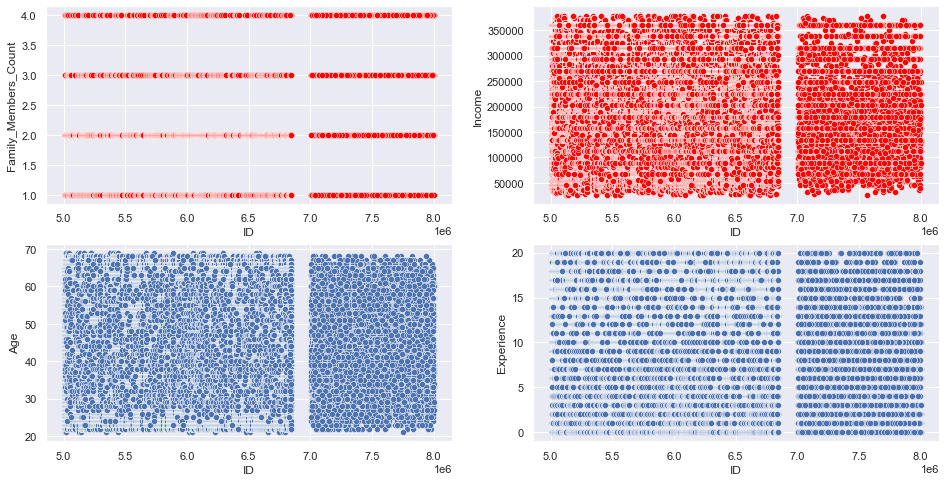

In [20]:
fig, ax= plt.subplots(nrows= 2, ncols = 2, figsize= (16,8))

sns.scatterplot(x='ID', y='Family_Members_Count', data=ApplicationDF, ax=ax[0][0], color= 'red')
sns.scatterplot(x='ID', y='Income', data=ApplicationDF, ax=ax[0][1], color='red' )
sns.scatterplot(x='ID', y='Age', data=ApplicationDF, ax=ax[1][0])
sns.scatterplot(x='ID', y='Experience', data=ApplicationDF, ax=ax[1][1])
sns.set_theme()

**We see now that there are no outliers to effect our study**

###  Engineering features from the credit dataset
We will join our datasets and keep only the data with ID's that are present in both datasets , but first we are going to engineer useful metrics  from the credit df 

We create a df that counts the amount of diffrent payment status we have observed for a customer
* Months he Didn't have an active Lending - Column X
* Months he Paid on time for his active lending - Column C
* Months he was  1-29 days Overdue on Payment - Column 0 
* Months he was 30-59 days Overdue on Payment - Column 1
* Months he was 60-89  days Overdue on Payment - Column 2
* Months he was 90-119 days Overdue on Payment - Column 3
* Months he was 120-149 days Overdue on Payment - Column 4
* Months he was 150 day days Overdue on Payment or more - Column 5

**Let' see now how we will get the desired meta-data**

* So we start by grouping by ID , and counting the timeseach status shows up for the respective ID, then we cast it into  DF for better access.
* We rename the df's third column as we have two columns named Status
* We reset the index to be able to call a column by name
* Now we pivot table , so we have the diffrent status values as columns . 
* The ID'S that didnt have a specific Status occuring now have Nan  , values so we fill them with zero's 

In [21]:
PaymentStatusCounts = CreditDF.groupby('ID')['STATUS'].value_counts()
PaymentStatusCounts  = pd.DataFrame(PaymentStatusCounts )
PaymentStatusCounts  = PaymentStatusCounts .rename(columns={PaymentStatusCounts.columns[0]: 'Counts'})
PaymentStatusCounts = PaymentStatusCounts.reset_index()
PaymentStatusCounts  = pd.pivot_table(data=PaymentStatusCounts , index=['ID'], columns=['STATUS'], values='Counts')
PaymentStatusCounts = PaymentStatusCounts.fillna(0)
PaymentStatusCounts = PaymentStatusCounts.reset_index()
PaymentStatusCounts.astype('int32').dtypes
PaymentStatusCounts

STATUS,ID,0,1,2,3,4,5,C,X
0,5001711,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5001712,10.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
2,5001713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
3,5001714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
4,5001715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
...,...,...,...,...,...,...,...,...,...
45980,5150482,12.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
45981,5150483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
45982,5150484,12.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45983,5150485,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To minimize the amount of variables especially for low frequency ones like 60 days overdue payments and up we
bundle together in Low Delay (1-29) , Medium Delay ( 30-89) , and High Delay (90 + )

In [22]:
PaymentStatusCounts['Low-Delay'] = PaymentStatusCounts['0'] 
PaymentStatusCounts['Medium-Delay'] = PaymentStatusCounts['1'] + PaymentStatusCounts['2'] 
PaymentStatusCounts['High-Delay'] = PaymentStatusCounts['3']  + PaymentStatusCounts['4'] + PaymentStatusCounts['5'] 

Now we drop the unneeded columns , and we give more descriptive names for columns

In [23]:
PaymentStatusCounts = PaymentStatusCounts.drop(['0', '1','2','3','4','5'], axis = 1)
PaymentStatusCounts = PaymentStatusCounts.rename(columns={"C": "On_Time", "X": "Without_Loan"})
PaymentStatusCounts

STATUS,ID,On_Time,Without_Loan,Low-Delay,Medium-Delay,High-Delay
0,5001711,0.0,1.0,3.0,0.0,0.0
1,5001712,9.0,0.0,10.0,0.0,0.0
2,5001713,0.0,22.0,0.0,0.0,0.0
3,5001714,0.0,15.0,0.0,0.0,0.0
4,5001715,0.0,60.0,0.0,0.0,0.0
...,...,...,...,...,...,...
45980,5150482,6.0,0.0,12.0,0.0,0.0
45981,5150483,0.0,18.0,0.0,0.0,0.0
45982,5150484,1.0,0.0,12.0,0.0,0.0
45983,5150485,0.0,0.0,2.0,0.0,0.0


### Combining - Intersection of ID's from the 2 table's
We see that the two tables have diffrent unique ID's , so we continue only with the ones
we can observe in both of them , and then we join them to the final dataset we are going to use in our models.

In [24]:
print("Unique Applicants " , len(pd.unique(ApplicationDF['ID'])))
print("Unique Applicants with credit scores" , len(pd.unique(PaymentStatusCounts['ID'])))
print("ID's Present in both datasets" , len(set(ApplicationDF['ID']).intersection(set(PaymentStatusCounts['ID']))))

Unique Applicants  396415
Unique Applicants with credit scores 45985
ID's Present in both datasets 33058


In [25]:
CompleteDF = ApplicationDF.join(PaymentStatusCounts.set_index('ID'), on='ID', how='inner')

But we also filter the initial CreditDF and PaymentStatusCount of the engineered features from CreditDF to keep only the ID's found in the intersection

In [26]:
value_list = np.unique(CompleteDF[['ID']].values)
boolean_series = CreditDF.ID.isin(value_list)
filtered_CreditDF = CreditDF[boolean_series]

value_list = np.unique(CompleteDF[['ID']].values)
boolean_series = PaymentStatusCounts.ID.isin(value_list)
PaymentStatusCounts = PaymentStatusCounts[boolean_series]
PaymentStatusCounts

STATUS,ID,On_Time,Without_Loan,Low-Delay,Medium-Delay,High-Delay
3233,5008806,7.0,16.0,7.0,0.0,0.0
3234,5008808,0.0,3.0,2.0,0.0,0.0
3235,5008809,0.0,5.0,0.0,0.0,0.0
3236,5008810,15.0,6.0,6.0,0.0,0.0
3237,5008811,27.0,6.0,6.0,0.0,0.0
...,...,...,...,...,...,...
45980,5150482,6.0,0.0,12.0,0.0,0.0
45981,5150483,0.0,18.0,0.0,0.0,0.0
45982,5150484,1.0,0.0,12.0,0.0,0.0
45983,5150485,0.0,0.0,2.0,0.0,0.0


### Target Variable for Prediction
We are going to assume that a client is a undesired client unfit for a credit card if one of the following is true :
* He has delayed payments of over 3 months in his credit record .
* The amount of times he delayed to pay from 1 month to 3 months , exceeds the amount of times he payed on time.

We also create a df to export containg only the target value for each of our applicants.

In [27]:
CompleteDF['target'] = np.where(((CompleteDF['High-Delay']> 0) |(CompleteDF['Medium-Delay']> CompleteDF['On_Time'])) ,1,0)

We can also see that we have an inbalanced target value , with about 15% unsuitable clients . 

In [28]:
CountTargetValues = CompleteDF.target.value_counts()
# CountTargetValues[1]/(CountTargetValues[1]+CountTargetValues[0])
CountTargetValues 

0    31032
1     2026
Name: target, dtype: int64

### Load 
These are the DF we extract from here , the other ones needed for the warehouse cube and scheme can be found in the Warehouse Process File 


In [29]:
# target.to_csv("target.csv",  encoding='utf-8') 
# PaymentStatusCounts.to_csv("PaymentStatusCounts.csv",  encoding='utf-8') 

### Models Preparation


###  Selecting Features - WOE and IV
An industry standar used widely in the credit card scoring and born from it is the use of weight of evidence and information value by separating customers into "Bad" and "Good" , we are going to use it here to find which of our variables is suited to run in our models based on the predictive power they hold , signaling the importance they hold in predicting our target value : 

| ΙV  | Predictive Power   |
|----------------|---------------|
| < 0.02           | Useless for Prediction                   |
| 0.02 to 0.1 | Weak Predictor                           |
| 0.1 to 0.3        | Medium Predictor                         |
| 0.3 to 0.5         | Strong Predictor                         |
| > 0.5         | suspicious or too good to be true        |

**Note*** See report for formula

In [30]:
def calc_iv(df, feature, target, pr=False):
    
    lst = []
    
    # for each unique value in our variables we calculate the frequency of 'Good' clients credit wise - 
    #  in relation to the value of the variable.

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        
                    val,df[df[feature] == val].count()[feature],                       
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) 
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
#  we get how distributed is the amount of bad values to the amount of unique values in the variable
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
#  we calculate the WOE values according to the formula 
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})
#  calculate for each unique value of the variable the iv so we can sum it later according to the formula 
    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))
# we get the variable sum , by adding the iv for each unique value
    iv = data['IV'].sum()

    return iv, data

In [31]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    
    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()

    return iv, data

In [32]:
columns = ['Gender','Own_Car','Own_Realty','Income','Own_Mobile','Own_Work_Phone','Own_Email','Family_Members_Count',
          'Married','Household_Size','Age','Experience','Income_Type_Pensioner','Income_Type_Student','Income_Type_Working',	
           'Education_College',	'Education_Secondary','Education_University','Housing_Type_Owned','Housing_Type_Rented',	
           'Housing_Type_With parents',	'On_Time','Without_Loan','Low-Delay','Medium-Delay','High-Delay']
listiv = []

for feature in columns:
    iv, data = calc_iv(CompleteDF, feature, 'target')
    listiv.append(round(iv,4))
Woe = pd.DataFrame(np.column_stack([columns, listiv]), 
                     columns=['Feature', 'iv']) 
Woe

c:\users\iliad\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Feature,iv
0,Gender,0.0059
1,Own_Car,0.0003
2,Own_Realty,0.0045
3,Income,0.1013
4,Own_Mobile,0.0
5,Own_Work_Phone,0.0001
6,Own_Email,0.0078
7,Family_Members_Count,0.0004
8,Married,0.0006
9,Household_Size,0.0008


So the Features we are going to include in our Models are : 
* All types of Payment Delay
* Months without Loan
* Months he paid on time 
* Work Experience
* Applicant Age
* Income

In [33]:
#  X is the raw variables without target and id labels
X = CompleteDF.iloc[:,1:-1]
TargetLabels = CompleteDF.iloc[:,-1]
# We keep only the selected features  , and a DF with the target labels
X = X[['Income','Age','Experience','On_Time','Without_Loan','Low-Delay','Medium-Delay','High-Delay']]

### Splitting Training and Testing sets 
We split our data  0.3 training to 0.7 testing

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,TargetLabels, test_size=0.3)

### Scaling Features
Given that we are going to implement Ml algorithms that calculate distances beetween data , it is essential that we take in account the relative scales of each of our features , so Feature Scaling before moving forward is a must .

In [35]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler()
Xscaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
Xtestscaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

### Inbalance Fixing- SMOTE
From what we saw the target values , are unbalanced 85% false to 15% true target value , this makes it much harder for the model to effectively learn the decision boundary . 

So we use Synthetic Minority Over-Sampling Technique(SMOTE) to overcome the sample imbalance problem . It works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample  along that line.

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
XSmote, ySmote= smote .fit_resample(Xscaled, y_train)
XtestSmote, ytestSmote = smote.fit_resample(Xtestscaled, y_test)

**We have now rejected features that have now predictive power over our target , split 70% to 30% test to train our data , scalled them with standar scaler to give them an equal opportunity to affect the models , and finally we have fixed the 85% "Good" Client to 15% "Bad Client" Imbalance with SMOTE.**

In [37]:
ySmote.value_counts()

0    21743
1    21743
Name: target, dtype: int64

In [38]:
y_train.value_counts()

0    21743
1     1397
Name: target, dtype: int64

### Running Models
We will run 6 Predictive Models 
Logistic Regression, K-Nearest Neighbors, Support Vector Machine (SVM), Decision Tree, Random Forest, XGBoost and CatBoost algorithms performed.

#### Logistic Regression
The most common algorithm used for classification problems , the model uses maximum likelihood to fix a sigmoid-curve on the target variable distribution . 

Logistic Regression Train Score 0.9767971301108402 Test Score 0.9747550866616428
      0     1
0  9024   265
1   204  9085


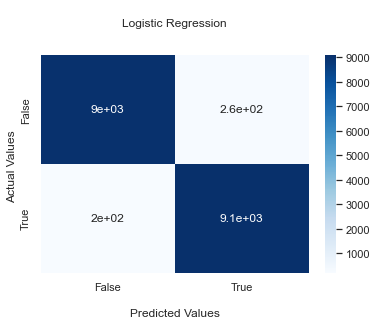

<Figure size 1080x576 with 0 Axes>

In [39]:
classifier =  LogisticRegression()
classifier.fit(XSmote, ySmote)

train_score = classifier.score(XSmote, ySmote)

test_score = classifier.score(XtestSmote ,ytestSmote)

y_predict = classifier.predict(XtestSmote)

print("Logistic Regression Train Score" ,train_score , "Test Score" , test_score )
print(pd.DataFrame(confusion_matrix(ytestSmote,y_predict)))
confusionmtrx = confusion_matrix(ytestSmote, y_predict)
ax = sns.heatmap(confusionmtrx, annot=True, cmap='Blues')

ax.set_title('\nLogistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.figure(figsize = (15,8))
plt.show()


# model = LogisticRegression(C=0.8,
#                            random_state=0,
#                            solver='lbfgs')
# model.fit(XSmote, ySmote)
# y_predict = model.predict(XtestSmote)

# print('Accuracy Score is {:.5}'.format(accuracy_score(ytestSmote, y_predict)))
# print(pd.DataFrame(confusion_matrix(ytestSmote,y_predict)))


#### Support Vector Machine
Support Vector Machine In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well. Support vector machine is highly preferred by many as it produces significant accuracy with less computation power.

Support Vector Machine Train Score  0.9896748378788576 Test Score 0.9828829798686619
      0     1
0  9160   129
1   189  9100


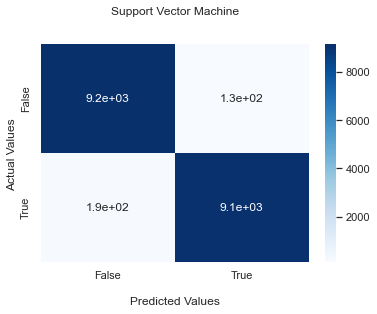

In [40]:
classifier =  SVC()
classifier.fit(XSmote, ySmote)

train_score = classifier.score(XSmote, ySmote)

test_score = classifier.score(XtestSmote ,ytestSmote)

y_predict = classifier.predict(XtestSmote)

print("Support Vector Machine Train Score " ,train_score , "Test Score" , test_score )
print(pd.DataFrame(confusion_matrix(ytestSmote,y_predict)))

confusionmtrx = confusion_matrix(ytestSmote, y_predict)
ax = sns.heatmap(confusionmtrx, annot=True, cmap='Blues')

ax.set_title('Support Vector Machine\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#### Decision Tree Classifier
In this method a set of training examples is broken down into smaller and smaller subsets while at the same time an associated decision tree get incrementally developed. At the end of the learning process, a decision tree covering the training set is returned.

Decision Tree Train Score  1.0 Test Score 0.999784691570675
      0     1
0  9287     2
1     2  9287


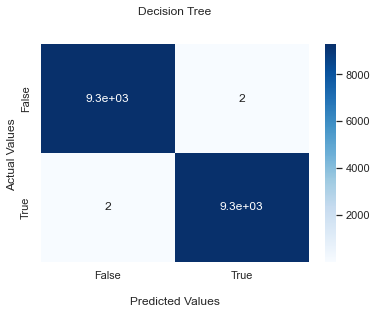

In [41]:
classifier =  DecisionTreeClassifier()
classifier.fit(XSmote, ySmote)

train_score = classifier.score(XSmote, ySmote)

test_score = classifier.score(XtestSmote ,ytestSmote)

y_predict = classifier.predict(XtestSmote)

print("Decision Tree Train Score " ,train_score , "Test Score" , test_score )
print(pd.DataFrame(confusion_matrix(ytestSmote,y_predict)))

confusionmtrx = confusion_matrix(ytestSmote, y_predict)
ax = sns.heatmap(confusionmtrx, annot=True, cmap='Blues')

ax.set_title('Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#### K-Nearest Neighbors 
K-Nearest Neighbor (KNN) algorithm predicts based on the specified number (k) of the nearest neighboring data points. Here, the pre-processing of the data is significant as it impacts the distance measurements directly. Unlike others, the model does not have a mathematical formula, neither any descriptive ability.

K-Nearest Neighbors Train Score  0.9858575173619096 Test Score 0.8867477661750458
      0     1
0  8880   409
1  1695  7594


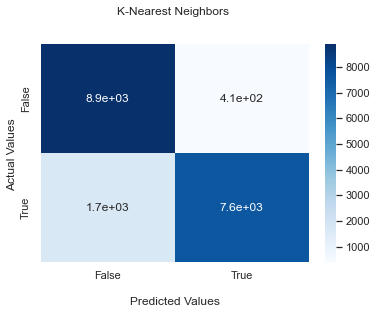

In [42]:
classifier =   KNeighborsClassifier()
classifier.fit(XSmote, ySmote)

train_score = classifier.score(XSmote, ySmote)

test_score = classifier.score(XtestSmote ,ytestSmote)

y_predict = classifier.predict(XtestSmote)

print("K-Nearest Neighbors Train Score " ,train_score , "Test Score" , test_score )
print(pd.DataFrame(confusion_matrix(ytestSmote,y_predict)))

confusionmtrx = confusion_matrix(ytestSmote, y_predict)
ax = sns.heatmap(confusionmtrx, annot=True, cmap='Blues')

ax.set_title('K-Nearest Neighbors \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#### XGBoost 
It is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. Execution speed and high performance are the main reasons to use XGBoost.


[23:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Train Score 1.0 Test Score 0.9998385186780062
      0     1
0  9289     0
1     3  9286


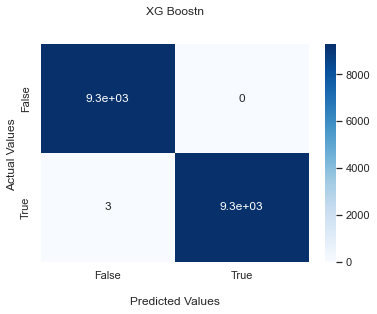

In [43]:
from xgboost import XGBClassifier
classifier =    XGBClassifier(use_label_encoder=False)


classifier.fit(XSmote, ySmote)

train_score = classifier.score(XSmote, ySmote)

test_score = classifier.score(XtestSmote ,ytestSmote)

y_predict = classifier.predict(XtestSmote)

print("XG Boost Train Score" ,train_score , "Test Score" , test_score )
print(pd.DataFrame(confusion_matrix(ytestSmote,y_predict)))


confusionmtrx = confusion_matrix(ytestSmote, y_predict)
ax = sns.heatmap(confusionmtrx, annot=True, cmap='Blues')

ax.set_title('XG Boostn\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#### Random Forest
A Random Forest is a reliable ensemble of multiple Decision Trees (or CARTs); though more popular for classification, than regression applications. Here, the individual trees are built via bagging (i.e. aggregation of bootstraps which are nothing but multiple train datasets created via sampling of records with replacement) and split using fewer features. The resulting diverse forest of uncorrelated trees exhibits reduced variance; therefore, is more robust towards change in data and carries its prediction accuracy to new data. It works well with both continuous & categorical data.

Random Forest Train 1.0 Test Score 0.9996232102486813
      0     1
0  9289     0
1     7  9282


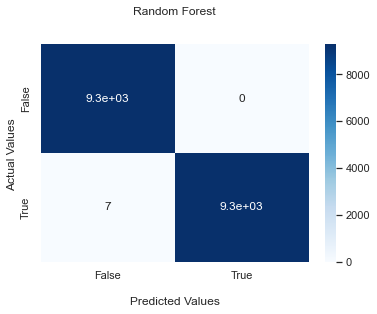

In [44]:
classifier =   RandomForestClassifier()
classifier.fit(XSmote, ySmote)

train_score = classifier.score(XSmote, ySmote)

test_score = classifier.score(XtestSmote ,ytestSmote)

y_predict = classifier.predict(XtestSmote)

print("Random Forest Train" ,train_score , "Test Score" , test_score )
print(pd.DataFrame(confusion_matrix(ytestSmote,y_predict)))

confusionmtrx = confusion_matrix(ytestSmote, y_predict)
ax = sns.heatmap(confusionmtrx, annot=True, cmap='Blues')

ax.set_title('Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#### CatBoost 
CatBoost is an open source algorithm based on gradient boosted decision trees. It supports numerical, categorical and text features. It works well with heterogeneous data and even relatively small data.

Learning rate set to 0.051583
0:	learn: 0.5154124	total: 156ms	remaining: 2m 35s
1:	learn: 0.3905481	total: 165ms	remaining: 1m 22s
2:	learn: 0.3037208	total: 173ms	remaining: 57.4s
3:	learn: 0.2350780	total: 183ms	remaining: 45.6s
4:	learn: 0.1816306	total: 192ms	remaining: 38.3s
5:	learn: 0.1408133	total: 201ms	remaining: 33.4s
6:	learn: 0.1098804	total: 210ms	remaining: 29.7s
7:	learn: 0.0862865	total: 219ms	remaining: 27.1s
8:	learn: 0.0644150	total: 228ms	remaining: 25.1s
9:	learn: 0.0481950	total: 237ms	remaining: 23.4s
10:	learn: 0.0367325	total: 246ms	remaining: 22.1s
11:	learn: 0.0285891	total: 254ms	remaining: 20.9s
12:	learn: 0.0245082	total: 263ms	remaining: 20s
13:	learn: 0.0194682	total: 274ms	remaining: 19.3s
14:	learn: 0.0158646	total: 285ms	remaining: 18.7s
15:	learn: 0.0131858	total: 297ms	remaining: 18.3s
16:	learn: 0.0118776	total: 307ms	remaining: 17.8s
17:	learn: 0.0100462	total: 319ms	remaining: 17.4s
18:	learn: 0.0086507	total: 333ms	remaining: 17.2s
19:	learn: 

174:	learn: 0.0006581	total: 1.74s	remaining: 8.18s
175:	learn: 0.0006581	total: 1.74s	remaining: 8.16s
176:	learn: 0.0006581	total: 1.75s	remaining: 8.15s
177:	learn: 0.0006581	total: 1.76s	remaining: 8.13s
178:	learn: 0.0006581	total: 1.77s	remaining: 8.1s
179:	learn: 0.0006581	total: 1.77s	remaining: 8.08s
180:	learn: 0.0006581	total: 1.78s	remaining: 8.06s
181:	learn: 0.0006581	total: 1.79s	remaining: 8.04s
182:	learn: 0.0006581	total: 1.8s	remaining: 8.02s
183:	learn: 0.0006581	total: 1.8s	remaining: 8s
184:	learn: 0.0006581	total: 1.81s	remaining: 7.97s
185:	learn: 0.0006581	total: 1.82s	remaining: 7.95s
186:	learn: 0.0006581	total: 1.82s	remaining: 7.92s
187:	learn: 0.0006581	total: 1.83s	remaining: 7.91s
188:	learn: 0.0006581	total: 1.84s	remaining: 7.89s
189:	learn: 0.0006581	total: 1.84s	remaining: 7.86s
190:	learn: 0.0006581	total: 1.85s	remaining: 7.84s
191:	learn: 0.0006581	total: 1.86s	remaining: 7.81s
192:	learn: 0.0006581	total: 1.86s	remaining: 7.79s
193:	learn: 0.0006

338:	learn: 0.0006578	total: 3.01s	remaining: 5.86s
339:	learn: 0.0006578	total: 3.01s	remaining: 5.85s
340:	learn: 0.0006578	total: 3.02s	remaining: 5.84s
341:	learn: 0.0006578	total: 3.03s	remaining: 5.83s
342:	learn: 0.0006578	total: 3.04s	remaining: 5.82s
343:	learn: 0.0006578	total: 3.04s	remaining: 5.8s
344:	learn: 0.0006578	total: 3.05s	remaining: 5.79s
345:	learn: 0.0006578	total: 3.06s	remaining: 5.78s
346:	learn: 0.0006578	total: 3.06s	remaining: 5.76s
347:	learn: 0.0006578	total: 3.07s	remaining: 5.75s
348:	learn: 0.0006578	total: 3.08s	remaining: 5.74s
349:	learn: 0.0006578	total: 3.08s	remaining: 5.73s
350:	learn: 0.0006578	total: 3.09s	remaining: 5.71s
351:	learn: 0.0006578	total: 3.1s	remaining: 5.7s
352:	learn: 0.0006578	total: 3.1s	remaining: 5.69s
353:	learn: 0.0006578	total: 3.11s	remaining: 5.68s
354:	learn: 0.0006578	total: 3.12s	remaining: 5.66s
355:	learn: 0.0006578	total: 3.12s	remaining: 5.65s
356:	learn: 0.0006578	total: 3.13s	remaining: 5.64s
357:	learn: 0.00

523:	learn: 0.0006577	total: 4.27s	remaining: 3.88s
524:	learn: 0.0006577	total: 4.28s	remaining: 3.87s
525:	learn: 0.0006577	total: 4.28s	remaining: 3.86s
526:	learn: 0.0006577	total: 4.29s	remaining: 3.85s
527:	learn: 0.0006577	total: 4.29s	remaining: 3.84s
528:	learn: 0.0006577	total: 4.3s	remaining: 3.83s
529:	learn: 0.0006577	total: 4.31s	remaining: 3.82s
530:	learn: 0.0006577	total: 4.31s	remaining: 3.81s
531:	learn: 0.0006577	total: 4.32s	remaining: 3.8s
532:	learn: 0.0006577	total: 4.33s	remaining: 3.79s
533:	learn: 0.0006577	total: 4.33s	remaining: 3.78s
534:	learn: 0.0006577	total: 4.34s	remaining: 3.77s
535:	learn: 0.0006577	total: 4.34s	remaining: 3.76s
536:	learn: 0.0006577	total: 4.35s	remaining: 3.75s
537:	learn: 0.0006577	total: 4.36s	remaining: 3.75s
538:	learn: 0.0006577	total: 4.37s	remaining: 3.74s
539:	learn: 0.0006577	total: 4.38s	remaining: 3.73s
540:	learn: 0.0006577	total: 4.38s	remaining: 3.72s
541:	learn: 0.0006577	total: 4.39s	remaining: 3.71s
542:	learn: 0.

689:	learn: 0.0006576	total: 5.35s	remaining: 2.4s
690:	learn: 0.0006576	total: 5.36s	remaining: 2.4s
691:	learn: 0.0006576	total: 5.36s	remaining: 2.39s
692:	learn: 0.0006576	total: 5.37s	remaining: 2.38s
693:	learn: 0.0006576	total: 5.38s	remaining: 2.37s
694:	learn: 0.0006576	total: 5.38s	remaining: 2.36s
695:	learn: 0.0006576	total: 5.39s	remaining: 2.35s
696:	learn: 0.0006576	total: 5.39s	remaining: 2.35s
697:	learn: 0.0006576	total: 5.4s	remaining: 2.34s
698:	learn: 0.0006576	total: 5.41s	remaining: 2.33s
699:	learn: 0.0006576	total: 5.41s	remaining: 2.32s
700:	learn: 0.0006576	total: 5.42s	remaining: 2.31s
701:	learn: 0.0006576	total: 5.43s	remaining: 2.3s
702:	learn: 0.0006576	total: 5.43s	remaining: 2.29s
703:	learn: 0.0006576	total: 5.44s	remaining: 2.29s
704:	learn: 0.0006576	total: 5.44s	remaining: 2.28s
705:	learn: 0.0006576	total: 5.45s	remaining: 2.27s
706:	learn: 0.0006576	total: 5.46s	remaining: 2.26s
707:	learn: 0.0006576	total: 5.46s	remaining: 2.25s
708:	learn: 0.00

854:	learn: 0.0006575	total: 6.43s	remaining: 1.09s
855:	learn: 0.0006575	total: 6.44s	remaining: 1.08s
856:	learn: 0.0006575	total: 6.45s	remaining: 1.07s
857:	learn: 0.0006575	total: 6.46s	remaining: 1.07s
858:	learn: 0.0006575	total: 6.46s	remaining: 1.06s
859:	learn: 0.0006575	total: 6.47s	remaining: 1.05s
860:	learn: 0.0006575	total: 6.47s	remaining: 1.04s
861:	learn: 0.0006575	total: 6.48s	remaining: 1.04s
862:	learn: 0.0006575	total: 6.49s	remaining: 1.03s
863:	learn: 0.0006575	total: 6.49s	remaining: 1.02s
864:	learn: 0.0006575	total: 6.5s	remaining: 1.01s
865:	learn: 0.0006575	total: 6.51s	remaining: 1.01s
866:	learn: 0.0006575	total: 6.51s	remaining: 999ms
867:	learn: 0.0006575	total: 6.52s	remaining: 992ms
868:	learn: 0.0006575	total: 6.53s	remaining: 984ms
869:	learn: 0.0006575	total: 6.53s	remaining: 976ms
870:	learn: 0.0006575	total: 6.54s	remaining: 968ms
871:	learn: 0.0006575	total: 6.54s	remaining: 961ms
872:	learn: 0.0006575	total: 6.55s	remaining: 953ms
873:	learn: 0

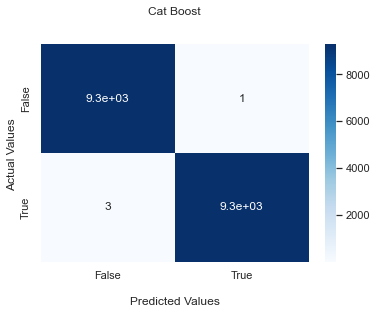

In [45]:
from catboost import CatBoostClassifier
classifier =   CatBoostClassifier()
classifier.fit(XSmote, ySmote)

train_score = classifier.score(XSmote, ySmote)

test_score = classifier.score(XtestSmote ,ytestSmote)

y_predict = classifier.predict(XtestSmote)

print("Catboost Train Score" ,train_score , "Test Score" , test_score )
print(pd.DataFrame(confusion_matrix(ytestSmote,y_predict)))

confusionmtrx = confusion_matrix(ytestSmote, y_predict)
ax = sns.heatmap(confusionmtrx, annot=True, cmap='Blues')

ax.set_title('Cat Boost\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

LGBM Classifier Train Score 1.0 Test Score 0.999784691570675
      0     1
0  9289     0
1     4  9285


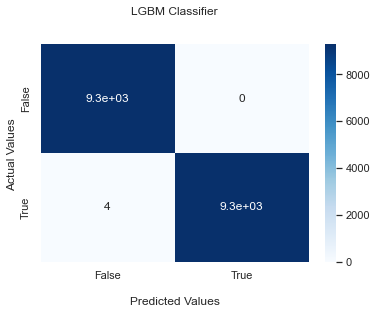

In [46]:

from lightgbm import LGBMClassifier
classifier =   LGBMClassifier()
classifier.fit(XSmote, ySmote)

train_score = classifier.score(XSmote, ySmote)

test_score = classifier.score(XtestSmote ,ytestSmote)

y_predict = classifier.predict(XtestSmote)

print("LGBM Classifier Train Score" ,train_score , "Test Score" , test_score )

print(pd.DataFrame(confusion_matrix(ytestSmote,y_predict)))

confusionmtrx = confusion_matrix(ytestSmote, y_predict)
ax = sns.heatmap(confusionmtrx, annot=True, cmap='Blues')

ax.set_title('LGBM Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()